# 生成進度條
from tqdm import tnrange, tqdm_notebook
from time import sleep
for i in tqdm_notebook(xrange(4), desc = '1st loop'):
    for j in tqdm_notebook(xrange(4), desc = '2nd loop', leave = False):
        sleep(0.01)

# Part I: Python for finance (1)

Collect data on the S&P 500 Index from Yahoo Finance, and five individual stocks:
(1) Apple Inc., (2) Microsoft Inc., (3) Starbucks Inc., (4) McDonald's Corporation, and (5) Tesla Inc.
The data to be collected is “daily” data from 2017/03/15 to 2022/03/15. 
You are required to write problems by using Python to
(1) Compute statistics: Mean, Standard Deviation, Minimum, Maximum, Skewness, Kurtosis and
(2) Plot probability density distribution.
In addition, you are required to provide the discussion by comparing these figures.

In [106]:
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression

AppleData = yf.download('AAPL', start = '2017-03-15', end = '2022-03-15')
MicroData = yf.download('MSFT', start = '2017-03-15', end = '2022-03-15')
StarData = yf.download('SBUX', start = '2017-03-15', end = '2022-03-15')
McDData = yf.download('MCD', start = '2017-03-15', end = '2022-03-15')
TeslaData = yf.download('TSLA', start = '2017-03-15', end = '2022-03-15')

ApplePrices = pd.DataFrame(AppleData['Adj Close'])
return_for_ApplePrices = ApplePrices.pct_change(1).dropna()
MicroPrices = pd.DataFrame(MicroData['Adj Close'])
return_for_MicroPrices = MicroPrices.pct_change(1).dropna()
StarPrices = pd.DataFrame(StarData['Adj Close'])
return_for_StarPrices = StarPrices.pct_change(1).dropna()
McDPrices = pd.DataFrame(McDData['Adj Close'])
return_for_McDPrices = McDPrices.pct_change(1).dropna()
TeslaPrices = pd.DataFrame(TeslaData['Adj Close'])
return_for_TeslaPrices = TeslaPrices.pct_change(1).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [105]:
# Compute statistics

AppleMean = float(return_for_ApplePrices.mean())
AppleStd = float(return_for_ApplePrices.std())
AppleMin = float(return_for_ApplePrices.min())
AppleMax = float(return_for_ApplePrices.max())
AppleSkew = float(return_for_ApplePrices.skew())
AppleKurt = float(return_for_ApplePrices.kurtosis())

MicroMean = float(return_for_MicroPrices.mean())
MicroStd = float(return_for_MicroPrices.std())
MicroMin = float(return_for_MicroPrices.min())
MicroMax = float(return_for_MicroPrices.max())
MicroSkew = float(return_for_MicroPrices.skew())
MicroKurt = float(return_for_MicroPrices.kurtosis())

StarMean = float(return_for_StarPrices.mean())
StarStd = float(return_for_StarPrices.std())
StarMin = float(return_for_StarPrices.min())
StarMax = float(return_for_StarPrices.max())
StarSkew = float(return_for_StarPrices.skew())
StarKurt = float(return_for_StarPrices.kurtosis())

McDMean = float(return_for_McDPrices.mean())
McDStd = float(return_for_McDPrices.std())
McDMin = float(return_for_McDPrices.min())
McDMax = float(return_for_McDPrices.max())
McDSkew = float(return_for_McDPrices.skew())
McDKurt = float(return_for_McDPrices.kurtosis())

TeslaMean = float(return_for_TeslaPrices.mean())
TeslaStd = float(return_for_TeslaPrices.std())
TeslaMin = float(return_for_TeslaPrices.min())
TeslaMax = float(return_for_TeslaPrices.max())
TeslaSkew = float(return_for_TeslaPrices.skew())
TeslaKurt = float(return_for_TeslaPrices.kurtosis())

stats = {'Mean':{'AAPL':AppleMean, 'MSFT':MicroMean, 'SBUX':StarMean, "MCD":McDMean, 'TSLA':TeslaMean},
             'Standard Deviation':{'AAPL':AppleStd, 'MSFT':MicroStd, 'SBUX':StarStd, "MCD":McDStd, 'TSLA':TeslaStd},
             'Minimum':{'AAPL':AppleMin, 'MSFT':MicroMin, 'SBUX':StarMin, "MCD":McDMin, 'TSLA':TeslaMin},
             'Maximum':{'AAPL':AppleMax, 'MSFT':MicroMax, 'SBUX':StarMax, "MCD":McDMax, 'TSLA':TeslaMax},
             'Skewness':{'AAPL':AppleSkew, 'MSFT':MicroSkew, 'SBUX':StarSkew, "MCD":McDSkew, 'TSLA':TeslaSkew},
             'Kurtosis':{'AAPL':AppleKurt, 'MSFT':MicroKurt, 'SBUX':StarKurt, "MCD":McDKurt, 'TSLA':TeslaKurt}}
stat_table = pd.DataFrame(stats)
print(stat_table)

          Mean  Standard Deviation   Minimum   Maximum  Skewness   Kurtosis
AAPL  0.001401            0.019459 -0.128647  0.119808 -0.059109   6.200272
MSFT  0.001370            0.017765 -0.147390  0.142169 -0.018242   9.790716
SBUX  0.000536            0.017732 -0.162042  0.147303 -0.060993  15.568932
MCD   0.000657            0.014714 -0.158754  0.181254  0.500025  34.990896
TSLA  0.002896            0.038867 -0.210628  0.198949  0.290823   4.695089


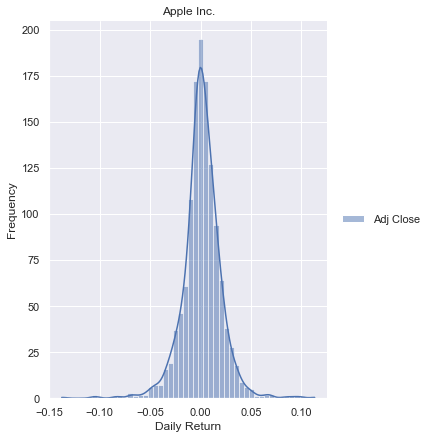

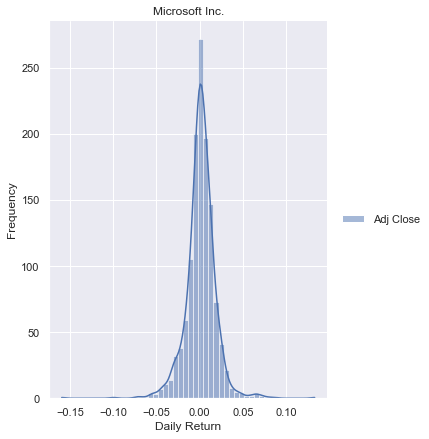

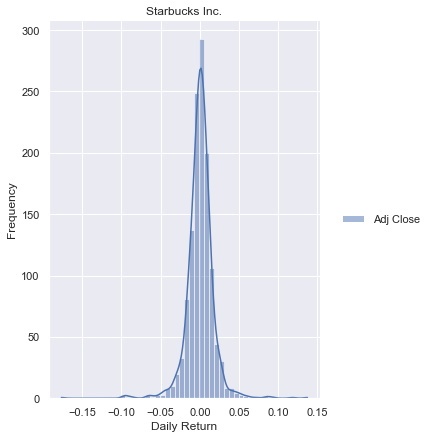

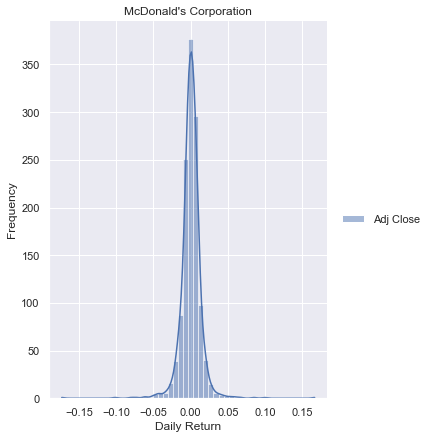

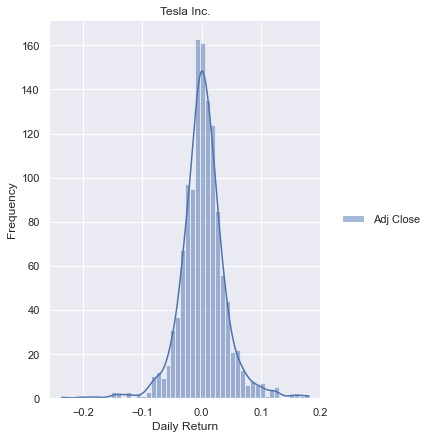

In [122]:
# Plot prob density dist

matplotlib.set_loglevel('error')

log_return_AAPL = np.log(1 + return_for_ApplePrices)
sns.displot(log_return_AAPL, kde = True, bins = 50) 
plt.title('Apple Inc.')
plt.xlabel("Daily Return") 
plt.ylabel("Frequency")

fig1 = plt.gcf()
fig1.set_size_inches(6, 6)
fig1.savefig('DailyReturn_AAPL.pdf', format='pdf', dpi=1000)
fig1.savefig('DailyReturn_AAPL.eps', format='eps', dpi=1000)
plt.show()

log_return_MSFT = np.log(1 + return_for_MicroPrices)
sns.displot(log_return_MSFT, kde = True, bins = 50) 
plt.title('Microsoft Inc.')
plt.xlabel("Daily Return") 
plt.ylabel("Frequency")

fig2 = plt.gcf()
fig2.set_size_inches(6, 6)
fig2.savefig('DailyReturn_MSFT.pdf', format='pdf', dpi=1000)
fig2.savefig('DailyReturn_MSFT.eps', format='eps', dpi=1000)
plt.show()

log_return_SBUX = np.log(1 + return_for_StarPrices)
sns.displot(log_return_SBUX, kde = True, bins = 50) 
plt.title('Starbucks Inc.')
plt.xlabel("Daily Return") 
plt.ylabel("Frequency")

fig3 = plt.gcf()
fig3.set_size_inches(6, 6)
fig3.savefig('DailyReturn_SBUX.pdf', format='pdf', dpi=1000)
fig3.savefig('DailyReturn_SBUX.eps', format='eps', dpi=1000)
plt.show()

log_return_MCD = np.log(1 + return_for_McDPrices)
sns.displot(log_return_MCD, kde = True, bins = 50) 
plt.title("McDonald's Corporation")
plt.xlabel("Daily Return") 
plt.ylabel("Frequency")

fig4 = plt.gcf()
fig4.set_size_inches(6, 6)
fig4.savefig('DailyReturn_MCD.pdf', format='pdf', dpi=1000)
fig4.savefig('DailyReturn_MCD.eps', format='eps', dpi=1000)
plt.show()

log_return_TSLA = np.log(1 + return_for_TeslaPrices)
sns.displot(log_return_TSLA, kde = True, bins = 50) 
plt.title('Tesla Inc.')
plt.xlabel("Daily Return") 
plt.ylabel("Frequency")

fig5 = plt.gcf()
fig5.set_size_inches(6, 6)
fig5.savefig('DailyReturn_TSLA.pdf', format='pdf', dpi=1000)
fig5.savefig('DailyReturn_TSLA.eps', format='eps', dpi=1000)
plt.show()

# Part I: Python for finance (2)

Suppose you invest in a portfolio that consists of the above five individual stocks.
Calculate VaR (1-day, 95%) of a portfolio equally invested in these five stocks. 
Portfolio market value is USD 100 million. 
• Compute VaR on this portfolio based on four methods
    (1) Full covariance model
    (2) Diagonal model (with one factor and the one factor is the stock market index)
    (3) Beta model (with one factor and the one factor is the stock market index)
    (4) Undiversified model (i.e., the summation of individual VaR on each assets)
You are required to collect data on the S&P 500 Index for the stock market index and the data on these five stocks from Yahoo Finance. The data to be collected is “daily” data from 2017/03/15 to 2022/03/15, and these data are to estimates parameters you need to compute VaR on the four models.

In [123]:
SPXData = yf.download('^GSPC', start = '2017-03-15', end = '2022-03-15')
SPXPrices = pd.DataFrame(SPXData['Adj Close'])
return_for_SPXPrices = SPXPrices.pct_change(1).dropna()

CI = 0.95  # confidence level
MV = 100000000  # portfoilio market value
N = len(SPXPrices)
n = 5  # number of stocks
Z = norm.ppf(CI)

[*********************100%***********************]  1 of 1 completed


In [132]:
print(Z)

1.6448536269514722


In [10]:
# Compute VaR with (1) Full covariance model

data = {'AAPL': return_for_ApplePrices['Adj Close'],
        'MSFT': return_for_MicroPrices['Adj Close'],
        'SBUX': return_for_StarPrices['Adj Close'],
        'MCD': return_for_McDPrices['Adj Close'],
        'TSLA': return_for_TeslaPrices['Adj Close']
        }

df = pd.DataFrame(data, columns=['AAPL', 'MSFT', 'SBUX', 'MCD', 'TSLA'])

M = pd.DataFrame.corr(df)  # corr matrix of 5 stocks

std_matrix = np.array((AppleStd, MicroStd, StarStd, McDStd, TeslaStd))  # individual std matrix
w_equal = MV / n  # weight of each stock

portfolio_vola_1 = math.sqrt(np.dot(np.dot(w_equal*std_matrix, M), w_equal*std_matrix))
VaR_1 = Z * portfolio_vola_1

          AAPL      MSFT      SBUX       MCD      TSLA
AAPL  1.000000  0.745061  0.501394  0.441089  0.422396
MSFT  0.745061  1.000000  0.556474  0.499616  0.429016
SBUX  0.501394  0.556474  1.000000  0.646583  0.297398
MCD   0.441089  0.499616  0.646583  1.000000  0.287673
TSLA  0.422396  0.429016  0.297398  0.287673  1.000000
[0.01945928 0.01776492 0.01773173 0.01471355 0.03886746] [389185.63941045 355298.48955762 354634.69257226 294270.97079909
 777349.22099262] 1645484.9513463383
2706581.890316091


In [66]:
# Compute VaR with (2) Diagonal model (with one factor and the one factor is the stock market index)

regr_AAPL = LinearRegression()
regr_AAPL.fit(return_for_SPXPrices, return_for_ApplePrices)
alpha_AAPL = float(regr_AAPL.intercept_)
beta_AAPL = float(regr_AAPL.coef_)
print('Apple:', alpha_AAPL, beta_AAPL)

regr_MSFT = LinearRegression()
regr_MSFT.fit(return_for_SPXPrices, return_for_MicroPrices)
alpha_MSFT = float(regr_MSFT.intercept_)
beta_MSFT = float(regr_MSFT.coef_)
print('Microsoft:', alpha_MSFT, beta_MSFT)

regr_SBUX = LinearRegression()
regr_SBUX.fit(return_for_SPXPrices, return_for_StarPrices)
alpha_SBUX = float(regr_SBUX.intercept_)
beta_SBUX = float(regr_SBUX.coef_)
print('Starbucks:', alpha_SBUX, beta_SBUX)

regr_MCD = LinearRegression()
regr_MCD.fit(return_for_SPXPrices, return_for_McDPrices)
alpha_MCD = float(regr_MCD.intercept_)
beta_MCD = float(regr_MCD.coef_)
print("McDonald's:", alpha_MCD, beta_MCD)

regr_TSLA = LinearRegression()
regr_TSLA.fit(return_for_SPXPrices, return_for_TeslaPrices)
alpha_TSLA = float(regr_TSLA.intercept_)
beta_TSLA = float(regr_TSLA.coef_)
print('Tesla:', alpha_TSLA, beta_TSLA)

SPXStd = float(return_for_SPXPrices.std())
# SPX_vola = (SPXStd**2)*np.eye(5, dtype = 'int')

# epsilon^2 of 5 stocks
e_vola_AAPL = AppleStd**2 - (beta_AAPL * SPXStd)**2
e_vola_MSFT = MicroStd**2 - (beta_MSFT * SPXStd)**2
e_vola_SBUX = StarStd**2 - (beta_SBUX * SPXStd)**2
e_vola_MCD = McDStd**2 - (beta_MCD * SPXStd)**2
e_vola_TSLA = TeslaStd**2 - (beta_TSLA * SPXStd)**2
e = np.array([e_vola_AAPL, e_vola_MSFT, e_vola_SBUX, e_vola_MCD, e_vola_TSLA])
De = np.diag(e)

Beta = np.array([beta_AAPL, beta_MSFT, beta_SBUX, beta_MCD, beta_TSLA])
WBeta = w_equal * Beta
W = np.ones([1, 5]) * w_equal

portfolio_vola_2 = math.sqrt(np.dot(WBeta, np.transpose(WBeta))*(SPXStd**2)
                             + np.dot(np.dot(W, De), np.transpose(W)))
VaR_2 = Z * portfolio_vola_2

Apple: 0.0007622461342753976 1.2087346728532369
Microsoft: 0.0007360314985482819 1.2007560990766406
Starbucks: 1.4963577586651683e-06 1.0120637252773153
McDonald's: 0.0002440989299786291 0.7811952552437413
Tesla: 0.0021756658608227206 1.3644674517178033
1720689.4370576818


In [68]:
# Compute VaR with (3) Beta model (with one factor and the one factor is the stock market index)

portfolio_vola_3 = math.sqrt(np.dot(WBeta, np.transpose(WBeta))*(SPXStd**2))
VaR_3 = Z * portfolio_vola_3

1030818.5147006887


In [124]:
# Compute VaR with (4) Undiversified model (i.e., the summation of individual VaR on each assets)

VaR_4 = float(np.dot(W, std_matrix) * Z)
print('VaR(1):', VaR_1)
print('VaR(2):', VaR_2)
print('VaR(3):', VaR_3)
print('VaR(4):', VaR_4)

VaR(1): 2706581.890316091
VaR(2): 1720689.4370576818
VaR(3): 1030818.5147006887
VaR(4): 3570547.9392442624


# Part I: Python for finance (3) Historical Simulation Method

Use the Historical Simulation method to compute VaR (1-day, 95%) for
(1) Apple Inc., (2) Microsoft Inc., (3) Starbucks Inc., (4) McDonald's Corporation, and (5) Tesla Inc.
The data to be collected is “daily” data from 2017/03/15 to 2022/03/15.
Please use the 2-year window to compute VaR. That is, the first VaR is identified on March 15, 2019, where it 
uses the data subsample from March 15, 2017 to March 14, 2019, and the second VaR is identified on March 16, 2019, using subsample from March 16, 2017 to March 14, 2019, and so on.

(i) You should calculate the indicator “hit” sequence for historical simulation models. 
    The hit sequence takes on the value 1 if the return is below the VaR and 0 otherwise.
(ii) Discuss whether using the Historical Simulation method to compute VaR for the is suitable or not.
[Note: Collect data in Yahoo Finance. And please refer to the example I provided in the 
class (excel file, named, HS_backtest_S&P500).]

In [128]:
# (1) Apple Inc.

sublen = len(return_for_ApplePrices.loc['2017-03-15':'2019-03-15'])  # length of a window
return_for_ApplePrices['hit'] = 0

for i in range(N-1-sublen):
    pi = float(np.percentile(return_for_ApplePrices['Adj Close'].iloc[i: i+sublen], 100 * (1-CI)))
    if pi >= float(return_for_ApplePrices['Adj Close'].iloc[i+sublen]):
        return_for_ApplePrices['hit'][i+sublen] = 1

# (2) Microsoft Inc.

return_for_MicroPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = float(np.percentile(return_for_MicroPrices['Adj Close'].iloc[i: i+sublen], 100 * (1-CI)))
    if pi >= float(return_for_MicroPrices['Adj Close'].iloc[i+sublen]):
        return_for_MicroPrices['hit'][i+sublen] = 1

# (3) Starbucks Inc.

return_for_StarPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = float(np.percentile(return_for_StarPrices['Adj Close'].iloc[i: i+sublen], 100 * (1-CI)))
    if pi >= float(return_for_StarPrices['Adj Close'].iloc[i+sublen]):
        return_for_StarPrices['hit'][i+sublen] = 1

# (4) McDonald's Corporation

return_for_McDPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = float(np.percentile(return_for_McDPrices['Adj Close'].iloc[i: i+sublen], 100 * (1-CI)))
    if pi >= float(return_for_McDPrices['Adj Close'].iloc[i+sublen]):
        return_for_McDPrices['hit'][i+sublen] = 1

# (5) Tesla Inc.

return_for_TeslaPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = float(np.percentile(return_for_TeslaPrices['Adj Close'].iloc[i: i+sublen], 100 * (1-CI)))
    if pi >= float(return_for_TeslaPrices['Adj Close'].iloc[i+sublen]):
        return_for_TeslaPrices['hit'][i+sublen] = 1

print('AAPL:', return_for_ApplePrices['hit'].sum())
print('MSFT:', return_for_MicroPrices['hit'].sum())
print('SBUX:', return_for_StarPrices['hit'].sum())
print('MCD:', return_for_McDPrices['hit'].sum())
print('TSLA:', return_for_TeslaPrices['hit'].sum())

print('AAPL:', return_for_ApplePrices['hit'].sum()/(N-1-sublen))
print('MSFT:', return_for_MicroPrices['hit'].sum()/(N-1-sublen))
print('SBUX:', return_for_StarPrices['hit'].sum()/(N-1-sublen))
print('MCD:', return_for_McDPrices['hit'].sum()/(N-1-sublen))
print('TSLA:', return_for_TeslaPrices['hit'].sum()/(N-1-sublen))

print((N-1-sublen)*(1-CI))

C:\Users\user\AppData\Local\Temp/ipykernel_26464/216187156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_ApplePrices['hit'][i+sublen] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_26464/216187156.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_MicroPrices['hit'][i+sublen] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_26464/216187156.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_StarP

AAPL: 36
MSFT: 35
SBUX: 48
MCD: 38
TSLA: 39
AAPL: 0.04768211920529802
MSFT: 0.046357615894039736
SBUX: 0.06357615894039735
MCD: 0.05033112582781457
TSLA: 0.051655629139072845
37.750000000000036


# Part I: Python for finance (4) Monte Carlo Simulation Method

Please replace the Historical Simulation Method with the Monte Carlos Simulation Method and answer all the above questions. 
Also, you need to discuss which method (the HS or the MC) is the most suitable one in terms of the daily VaR. 
[Note: Please refer to the example I provided in the class (excel file, named, MC_VaR_S&P500_WCC).

In [130]:
annualreturn_AAPL = 252 * float(return_for_ApplePrices['Adj Close'].iloc[: sublen].mean())
annualrevola_AAPL = math.sqrt(252) * float(return_for_ApplePrices['Adj Close'].iloc[: sublen].std())
annualreturn_MSFT = 252 * float(return_for_MicroPrices['Adj Close'].iloc[: sublen].mean())
annualrevola_MSFT = math.sqrt(252) * float(return_for_MicroPrices['Adj Close'].iloc[: sublen].std())
annualreturn_SBUX = 252 * float(return_for_StarPrices['Adj Close'].iloc[: sublen].mean())
annualrevola_SBUX = math.sqrt(252) * float(return_for_StarPrices['Adj Close'].iloc[: sublen].std())
annualreturn_MCD = 252 * float(return_for_McDPrices['Adj Close'].iloc[: sublen].mean())
annualrevola_MCD = math.sqrt(252) * float(return_for_McDPrices['Adj Close'].iloc[: sublen].std())
annualreturn_TSLA = 252 * float(return_for_TeslaPrices['Adj Close'].iloc[: sublen].mean())
annualrevola_TSLA = math.sqrt(252) * float(return_for_TeslaPrices['Adj Close'].iloc[: sublen].std())

t_per_sub = 1/365
stimu = 10000  # stimulation times

S0_AAPL = ApplePrices['Adj Close'].iloc[sublen]  # initial price
return_list_AAPL = []
for i in range(stimu):
    x = random.gauss(mu = 0, sigma = 1)
    S1 = math.exp((annualreturn_AAPL - ((annualrevola_AAPL**2)/2))*t_per_sub 
                  + (annualrevola_AAPL*x*math.sqrt(t_per_sub))) * S0_AAPL
    re = (S1-S0_AAPL) / S0_AAPL
    return_list_AAPL.append(re)
VaR_AAPL_M = -1 * float(np.percentile(return_list_AAPL, 100 * (1-CI)))

S0_MSFT = MicroPrices['Adj Close'].iloc[sublen]  # initial price
return_list_MSFT = []
for i in range(stimu):
    x = random.gauss(mu = 0, sigma = 1)
    S1 = math.exp((annualreturn_MSFT - ((annualrevola_MSFT**2)/2))*t_per_sub 
                  + (annualrevola_MSFT*x*math.sqrt(t_per_sub))) * S0_MSFT
    re = (S1-S0_MSFT) / S0_MSFT
    return_list_MSFT.append(re)
VaR_MSFT_M = -1 * float(np.percentile(return_list_MSFT, 100 * (1-CI)))

S0_SBUX = StarPrices['Adj Close'].iloc[sublen]  # initial price
return_list_SBUX = []
for i in range(stimu):
    x = random.gauss(mu = 0, sigma = 1)
    S1 = math.exp((annualreturn_SBUX - ((annualrevola_SBUX**2)/2))*t_per_sub 
                  + (annualrevola_SBUX*x*math.sqrt(t_per_sub))) * S0_SBUX
    re = (S1-S0_SBUX) / S0_SBUX
    return_list_SBUX.append(re)
VaR_SBUX_M = -1 * float(np.percentile(return_list_SBUX, 100 * (1-CI)))

S0_MCD = McDPrices['Adj Close'].iloc[sublen]  # initial price
return_list_MCD = []
for i in range(stimu):
    x = random.gauss(mu = 0, sigma = 1)
    S1 = math.exp((annualreturn_MCD - ((annualrevola_MCD**2)/2))*t_per_sub 
                  + (annualrevola_MCD*x*math.sqrt(t_per_sub))) * S0_MCD
    re = (S1-S0_MCD) / S0_MCD
    return_list_MCD.append(re)
VaR_MCD_M = -1 * float(np.percentile(return_list_MCD, 100 * (1-CI)))

S0_TSLA = TeslaPrices['Adj Close'].iloc[sublen]  # initial price
return_list_TSLA = []
for i in range(stimu):
    x = random.gauss(mu = 0, sigma = 1)
    S1 = math.exp((annualreturn_TSLA - ((annualrevola_TSLA**2)/2))*t_per_sub 
                  + (annualrevola_TSLA*x*math.sqrt(t_per_sub))) * S0_TSLA
    re = (S1-S0_TSLA) / S0_TSLA
    return_list_TSLA.append(re)
VaR_TSLA_M = -1 * float(np.percentile(return_list_TSLA, 100 * (1-CI)))

print('AAPL:', 'VaR(return) is', VaR_AAPL_M, 'and VaR(dollar) is', VaR_AAPL_M*S0_AAPL)
print('MSFT:', 'VaR(return) is', VaR_MSFT_M, 'and VaR(dollar) is', VaR_MSFT_M*S0_MSFT)
print('SBUX:', 'VaR(return) is', VaR_SBUX_M, 'and VaR(dollar) is', VaR_SBUX_M*S0_SBUX)
print('MCD:', 'VaR(return) is', VaR_MCD_M, 'and VaR(dollar) is', VaR_MCD_M*S0_MCD)
print('TSLA:', 'VaR(return) is', VaR_TSLA_M, 'and VaR(dollar) is', VaR_TSLA_M*S0_TSLA)

AAPL: VaR(return) is 0.021027979918549256 and VaR(dollar) is 0.9526994285631882
MSFT: VaR(return) is 0.019313641388597473 and VaR(dollar) is 2.1695146341705867
SBUX: VaR(return) is 0.0169653259817763 and VaR(dollar) is 1.1344772195804775
MCD: VaR(return) is 0.01442689206111967 and VaR(dollar) is 2.492154246743766
TSLA: VaR(return) is 0.04254687222617541 and VaR(dollar) is 2.3437369411265787


In [131]:
# (1) Apple Inc.

return_for_ApplePrices['hit'] = 0

for i in range(N-1-sublen):
    pi = -1 * VaR_AAPL_M
    if pi >= float(return_for_ApplePrices['Adj Close'].iloc[i+sublen]):
        return_for_ApplePrices['hit'][i+sublen] = 1

# (2) Microsoft Inc.

return_for_MicroPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = -1 * VaR_MSFT_M
    if pi >= float(return_for_MicroPrices['Adj Close'].iloc[i+sublen]):
        return_for_MicroPrices['hit'][i+sublen] = 1

# (3) Starbucks Inc.

return_for_StarPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = -1 * VaR_SBUX_M
    if pi >= float(return_for_StarPrices['Adj Close'].iloc[i+sublen]):
        return_for_StarPrices['hit'][i+sublen] = 1

# (4) McDonald's Corporation

return_for_McDPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = -1 * VaR_MCD_M
    if pi >= float(return_for_McDPrices['Adj Close'].iloc[i+sublen]):
        return_for_McDPrices['hit'][i+sublen] = 1

# (5) Tesla Inc.

return_for_TeslaPrices['hit'] = 0

for i in range(N-1-sublen):
    pi = -1 * VaR_TSLA_M
    if pi >= float(return_for_TeslaPrices['Adj Close'].iloc[i+sublen]):
        return_for_TeslaPrices['hit'][i+sublen] = 1

print('AAPL:', return_for_ApplePrices['hit'].sum())
print('MSFT:', return_for_MicroPrices['hit'].sum())
print('SBUX:', return_for_StarPrices['hit'].sum())
print('MCD:', return_for_McDPrices['hit'].sum())
print('TSLA:', return_for_TeslaPrices['hit'].sum())

AAPL: 75
MSFT: 78
SBUX: 81
MCD: 65
TSLA: 70


C:\Users\user\AppData\Local\Temp/ipykernel_26464/1830287752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_ApplePrices['hit'][i+sublen] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_26464/1830287752.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_MicroPrices['hit'][i+sublen] = 1
C:\Users\user\AppData\Local\Temp/ipykernel_26464/1830287752.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_for_St

# Pat II: Solve the questions (1)

Consider a portfolio equally invested in two assets: TESCO and MORRISON.
Portfolio market value is 100 million.
The annualized volatility for TESCO stock returns is 40%, and the annualized volatility for MORRISON stock returns is 30%.
The correlation between TESCO and MORRISON stock returns is 0.8.
1.1) Calculate the VaR on each asset and the VaR on the portfolio based on the full covariance approach assuming normally distributed returns with a 95% confidence level for a 10-day holding period and 250 business days in a year.

1.2) Compute VaR of the portfolio based on the beta model with one common factor assuming normally distributed returns with a 95% confidence level for a 10-day holding period and 250 business days in a year. The only factor affecting stock returns is the market, and the daily volatility of the market (σm) is 0.03. The market exposure (β) for TESCO is 0.5, and for MORRISON is 0.2.

1.3) VaR on a portfolio can be measured by four approaches: (1) VaR (full covariance), measured by the full covariance model; VaR (Diagonal model with one common factor) (3) VaR (beta model with one common factor); (4) VaR (undiversified measured by adding up all individual VaRs.
You are required to rank the VaRs computed based these four approaches and provide a theoretical discussion on the rank you provide.

# Pat II: Solve the questions (2)

2.1) A report mentions that the VaR (Value at Risk) for a portfolio is $2.5 million over one month and at the 99\% confidence level. Based on the definition of VaR, what does this report indicate?

2.2) Consider a zero coupon bond with 5 years maturity with face value $100. The internal rate of return (IRR, y) is 2% and the daily volatility of the IRR is 0.0008 (8 basis points).
Compute the dollar VaR based on the duration model over 1-day and under 99% confidence level. 

# Pat II: Solve the questions (3)

A bank sells one call option on stock X and one put option on stock Z.
X market value is $50, strike price is $51, volatility is 28% (annual) and time to maturity 9 months.
Z market value is $20, strike price is $19, volatility is 25% (annual) and time to maturity is 1 year.
No dividends are paid. One-year risk free rate is 6%. Correlation between assets Z and X returns is 0.4.
Calculate portfolio’s VaR ( 99%, 10 days):
3.1) Using only the delta-normal method to compute VaR